# Labolatorium 4 - Symulowane wyżarzanie

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Funkcją temperatury jest funkcja logistyczna: $\frac{L}{1+e^{-kx}}$. Funkcją prawdopodobeństwa akceptacji stanu o wyższej energi jest: $e^{\frac{-\Delta E}{T}}$ i stan o mniejszej energii jest zawsze akceptowany.

## Zandanie 1 - Problem konwojażera
Funkcją energii jest suma długości odcinków między punktami. Sąsiedzi są generowani dwoma medodami zamiany pónków w kolejności ich odwiedzenia: dwa losowe punkty lub dwa sąsiednie punkty.

Najpierw zosatły wygenerowane 3 zbiory: punkty rozłożne rozkładem jednostajnym, punkty rozłożone rozkładem normalnym, 9 oddalonych od siebie gróp punktów. 

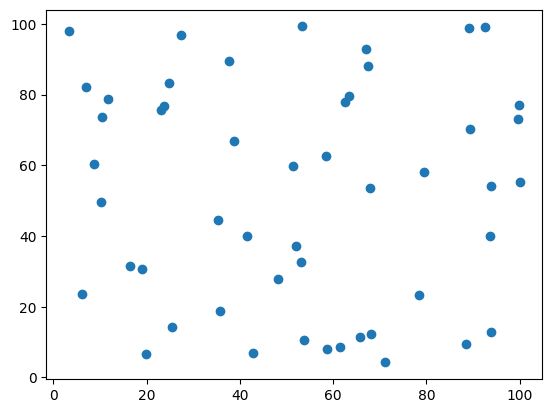

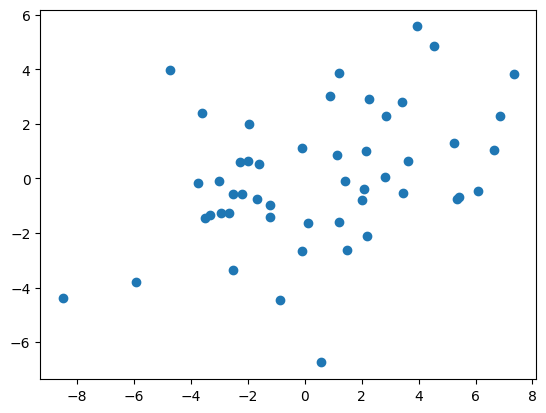

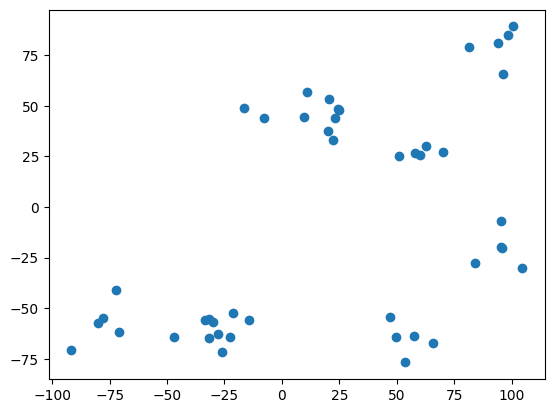

In [30]:
from zad1 import draw_path, generate_uniform_points, generate_normal_points, generate_9_groups, anealing_succ, anealing_rand

N = 50

uniform = generate_uniform_points(N, 0, 100)
normal = generate_normal_points(N, 10, 10, 10, 0)
groups = generate_9_groups(N, 20, -100, 100)

def draw_points(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.show()

draw_points(uniform)
draw_points(normal)
draw_points(groups)

Najpierw sprawdzam rozwiązania otrzymane kożystając z pierwszego sposobu generowania sąsiadów.

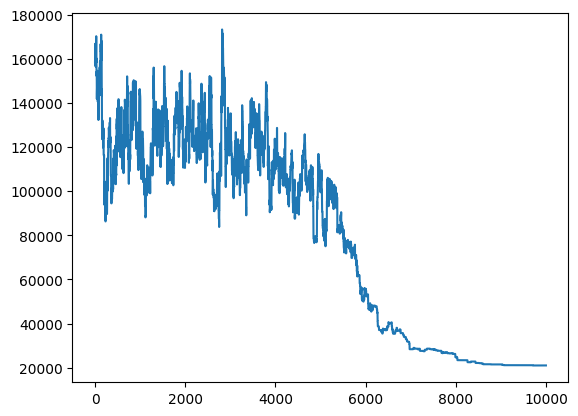

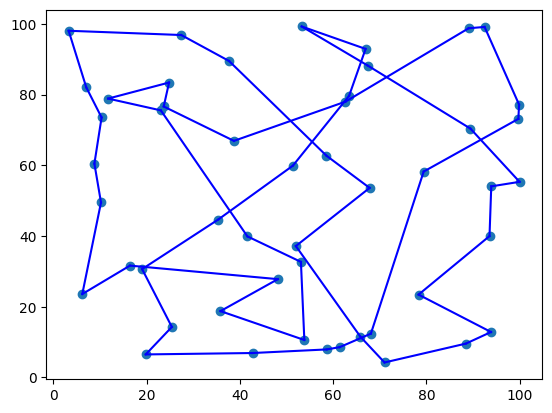

20974.199758974748


In [31]:
path, val = anealing_rand(N, 5000, 10000, uniform)
draw_path(uniform, path)
print(val)

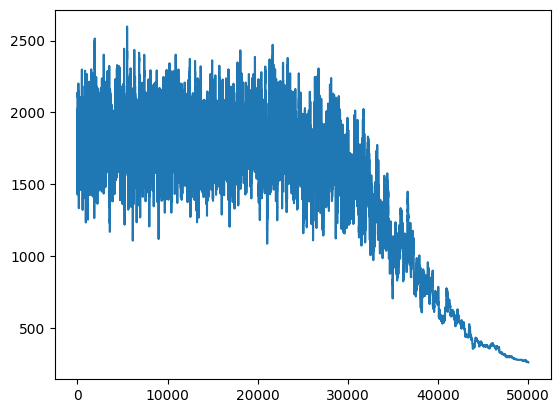

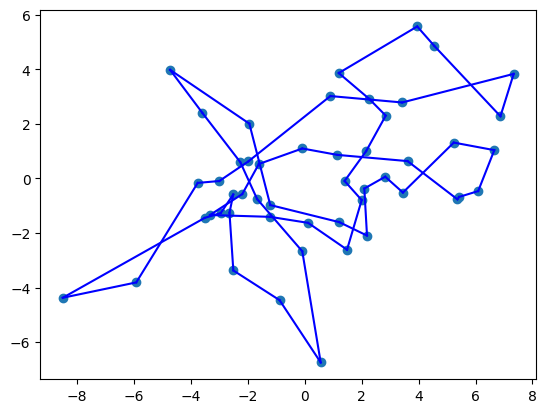

258.64279247011234


In [32]:
path, val = anealing_rand(N, 500, 50000, normal)
draw_path(normal, path)
print(val)

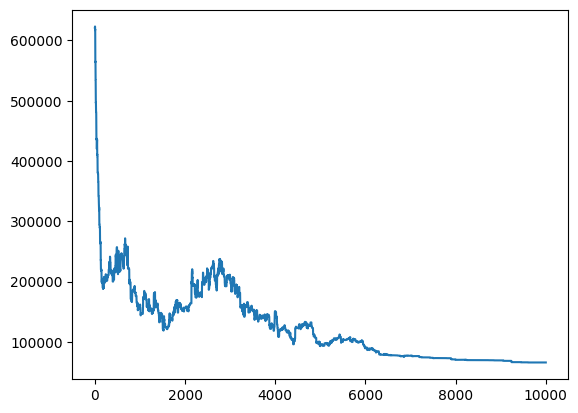

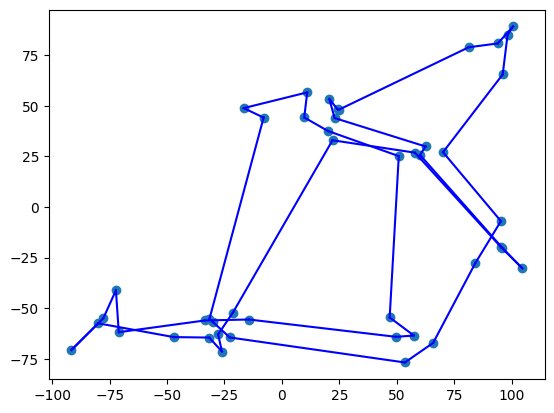

65780.24145713323


In [33]:
path, val = anealing_rand(len(groups), 5000, 10000, groups)
draw_path(groups, path)
print(val)

Można zauważyć że przy dziewięciu grupach na początku wartość energi spada dość szybko, jest to prawdopodobne spowodowane tym że algorytm znajduje duże optymalizacje natychmiastowo przez zamianę połączeń między grupami na o wiele bliższe.

Teraz sprawdzamy wariant z zamianą sąsiednich w kolejności punktów.

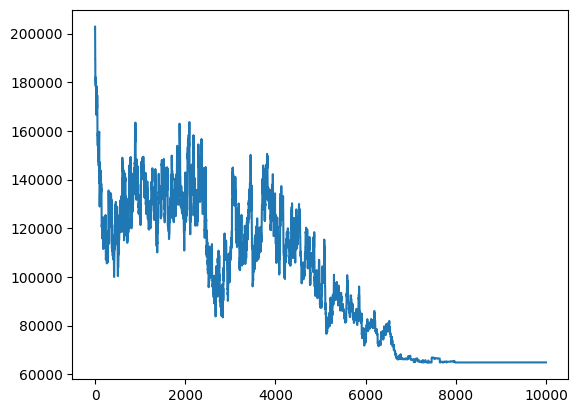

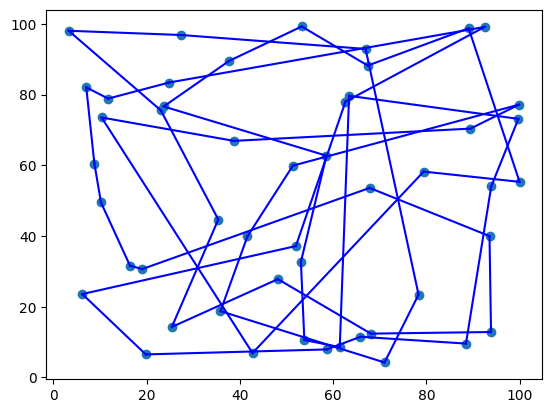

64879.26556629636


In [34]:
path, val = anealing_succ(N, 5000, 10000, uniform)
draw_path(uniform, path)
print(val)

Zauważamy że ten wariant oblicza gorsze rozwiązania od zamieniania w pełni losowego gdy inne paremtry są identyczne. Może to być spowodowane faktem że ta wersja jest bardzo zależna od początkowego stanu, jęsli będzie on zawierał dużo połaczeń dalekich od siebie punktów ta metoda nie zauważy lepszych rozwiązań.

## Zadanie 2 - obraz binarny

Generowanie sąsiadów:

"Sąsiadujący" obraz jest generowany przez zamianę miejsc dwóch pikseli o różnych kolorach.

Funkcje energii:

Zostały zaimplementowane 3 funkcje energii:
- Te same kolory się przyciągają (4 i 8 sąsiadów)
- Te same kolory w bezpośrednim sąsiedztwie się przyciągają a w dalszym odpychają (8 bliskich i 16 dalekich sąsiadów)
- Adaptacja modelu Isinga (4 i 8 sąsiadów)

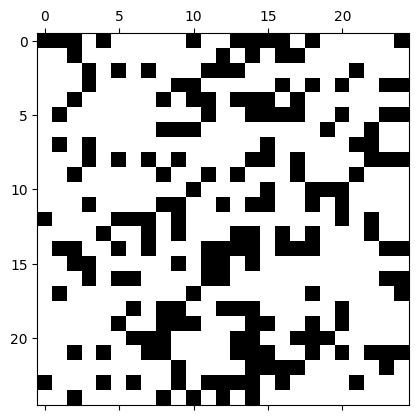

In [1]:
from zad2 import image_anneal, image_generator, display_image, animation_form_images

#Przykładowy obraz
display_image(image_generator(25, 0.3))

Najpierw porównany zostanie wpływ typu sąsiedztwa na wynik przy gęstości czaarnych punktów 0.4. Do sprawdzenia tego użyjemy pierwszej funkcji energii.

100%|██████████| 10000/10000 [15:09<00:00, 10.99it/s]


13202


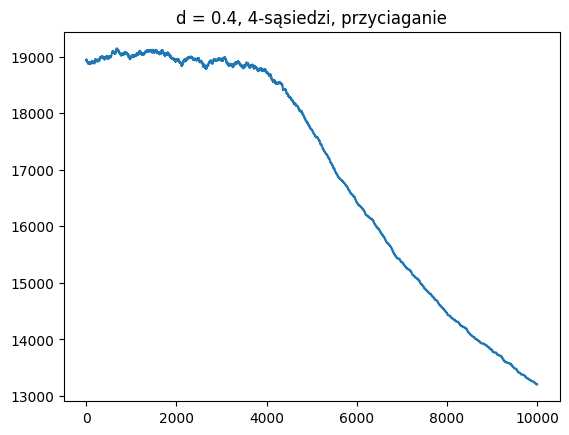

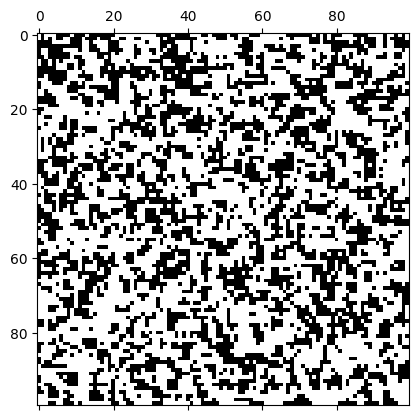

Prosessing...


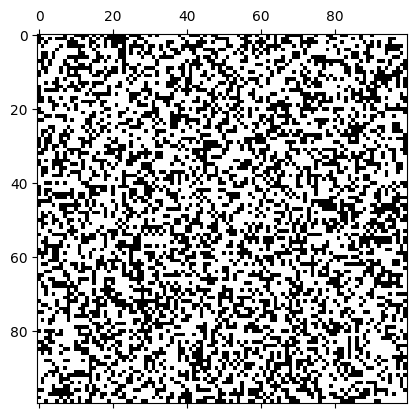

In [4]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 10000, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, 4-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 10000/10000 [27:48<00:00,  5.99it/s]


27874


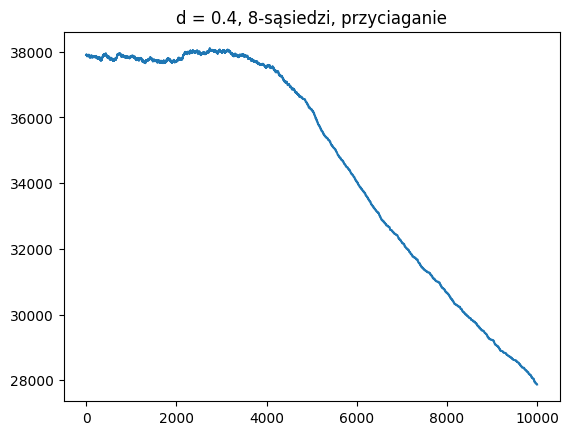

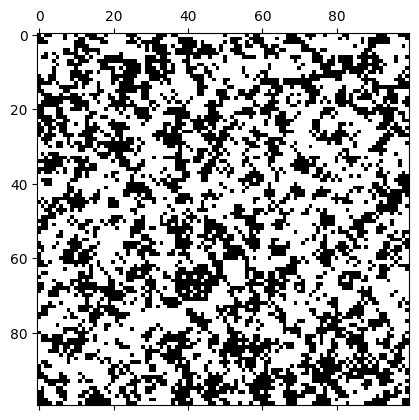

Prosessing...


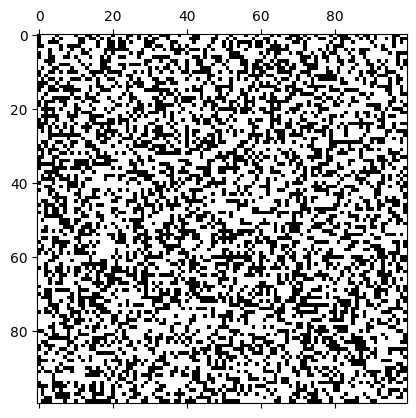

In [5]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 10000, 1, 2)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, 8-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

Grupy punktów wydają się być większe przy 8-sąsiedztwie

Następnie sprawdzimy jak wpływa na wyniki różna funkcja kosztu z tym samym typem sąsiedztwa. Zostanie do tego wykożystane 4-sąsiedztwo, 0.3 jako gęstość czarnych punktów. Testowanymi funkcjami energii będzią: opdychające się te same kolory oraz moja adaptacja modelu isinga ferromagetycznego i antyferromagnetyczny.

100%|██████████| 10000/10000 [14:27<00:00, 11.53it/s]


11604


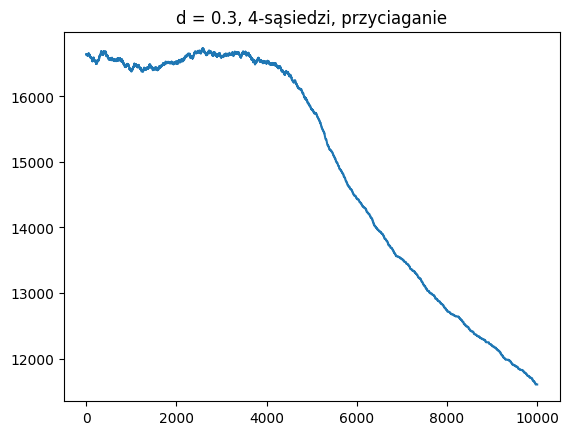

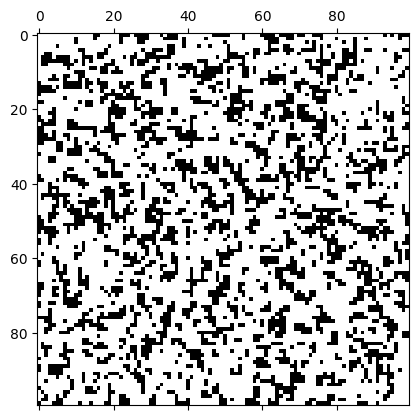

Prosessing...


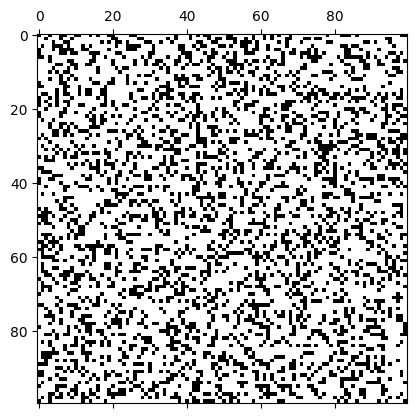

In [6]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 10000, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 10000/10000 [18:27<00:00,  9.03it/s]


-3108.0


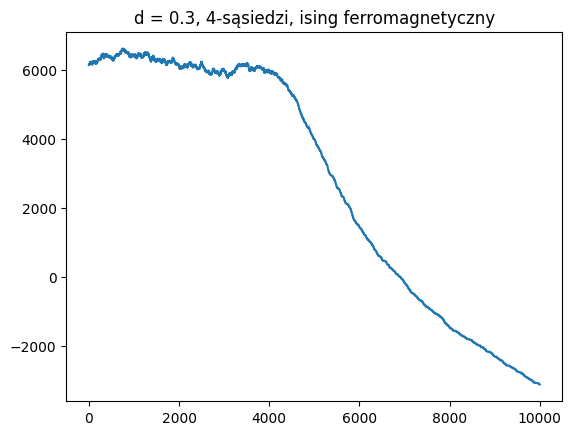

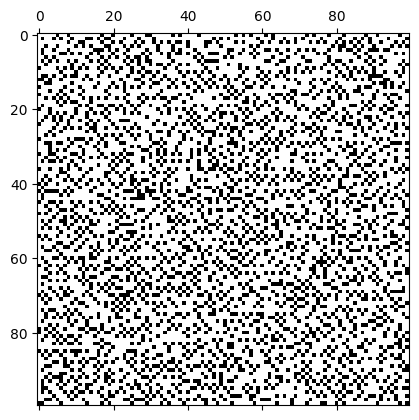

Prosessing...


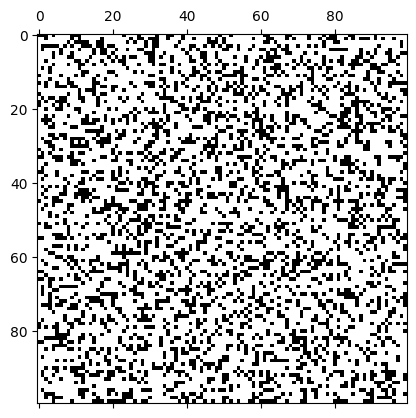

In [7]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 10000, 3, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, ising ferromagnetyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 10000/10000 [14:15<00:00, 11.68it/s]


11516


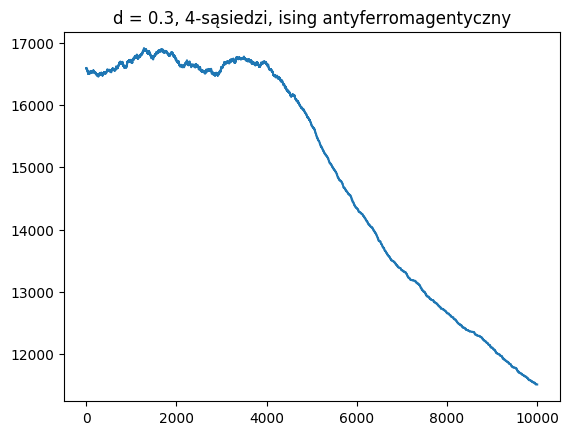

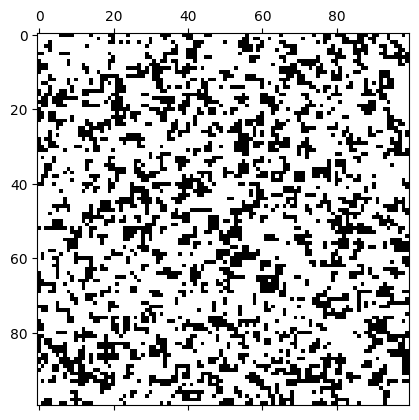

Prosessing...


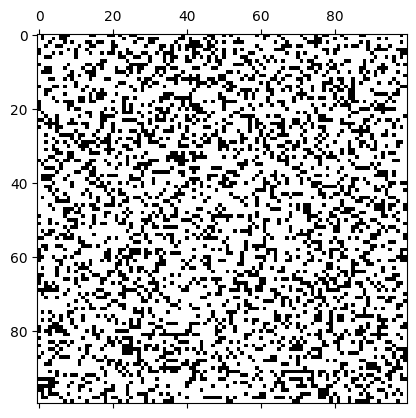

In [8]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 10000, 1, 1, -1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, ising antyferromagentyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

Można zauważyć że wzór który otrzymaliśmy z pierwszej wersji i isiga antyferromagnetycznego są bardzo podobne. Bardzo ciekway jest przypadek isinga ferromagnetyczngo dzie punkty rozłożyły się równomiernie.

Następnie sprawdzony zostanie wpływ dystrbucji czarnych punktów na końcowy wynik. Użyjemy do tego fukcji energi przyciagającej i odpychającej.

100%|██████████| 5000/5000 [10:20<00:00,  8.05it/s]


33236


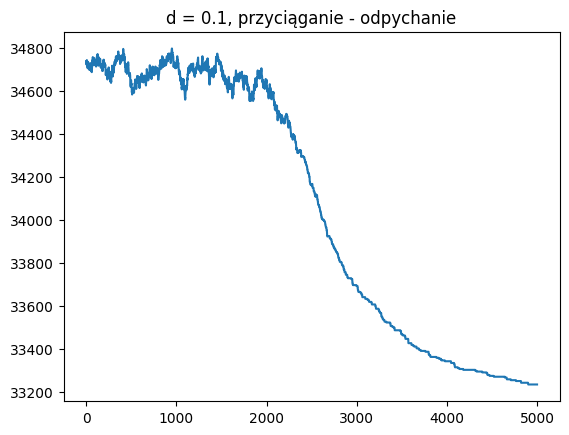

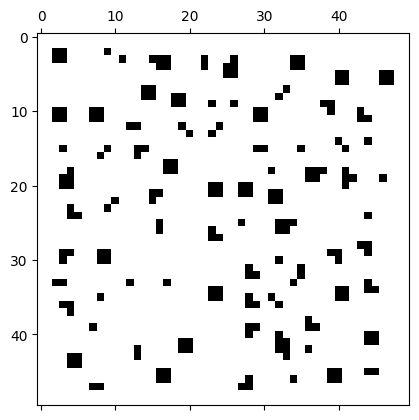

Prosessing...


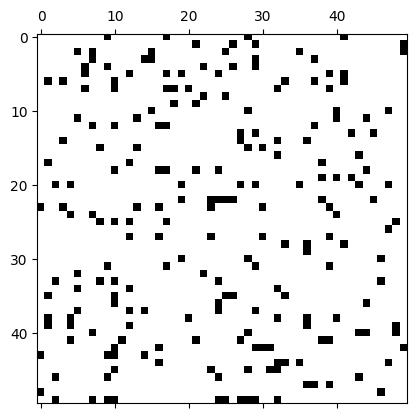

In [3]:
img, min_e, values, images = image_anneal(50, 0.1, 5230, 5000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.1, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 5000/5000 [09:40<00:00,  8.62it/s]


26078


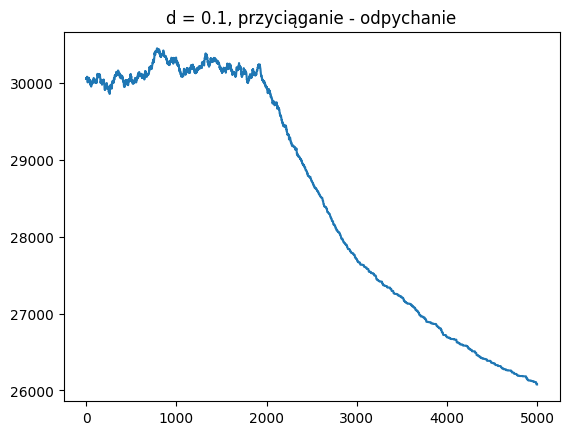

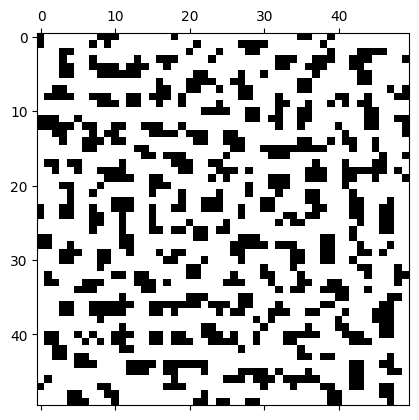

Prosessing...


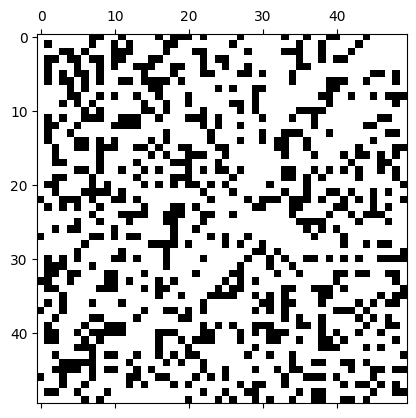

In [4]:
img, min_e, values, images = image_anneal(50, 0.3, 5230, 5000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.1, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 5000/5000 [09:40<00:00,  8.62it/s]


24068


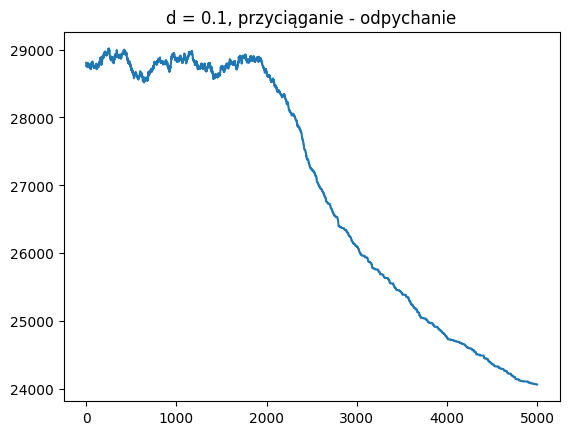

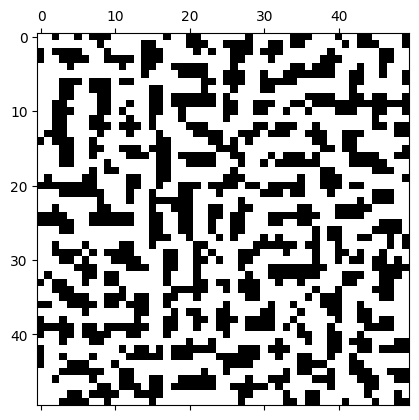

Prosessing...


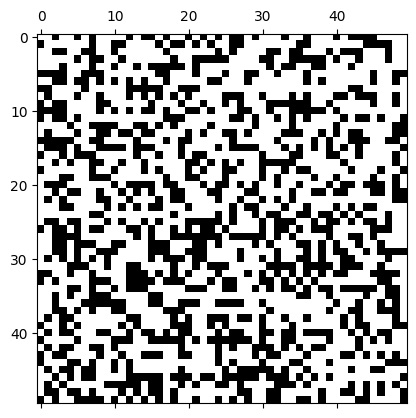

In [5]:
img, min_e, values, images = image_anneal(50, 0.4, 5230, 5000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.1, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)